In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/urinalysis_tests.csv')
df.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1436 non-null   int64  
 1   Age               1436 non-null   float64
 2   Gender            1436 non-null   object 
 3   Color             1435 non-null   object 
 4   Transparency      1436 non-null   object 
 5   Glucose           1436 non-null   object 
 6   Protein           1436 non-null   object 
 7   pH                1436 non-null   float64
 8   Specific Gravity  1436 non-null   float64
 9   WBC               1436 non-null   object 
 10  RBC               1436 non-null   object 
 11  Epithelial Cells  1436 non-null   object 
 12  Mucous Threads    1436 non-null   object 
 13  Amorphous Urates  1436 non-null   object 
 14  Bacteria          1436 non-null   object 
 15  Diagnosis         1436 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Color,1
Transparency,0
Glucose,0
Protein,0
pH,0
Specific Gravity,0
WBC,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(1435, 16)

In [ ]:
df=df.drop(columns='Unnamed: 0', axis=1)

In [ ]:
df.tail()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
1431,0.06,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1-2,0-1,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1432,42.00,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1433,47.00,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,2-4,0-2,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1434,57.00,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,0-2,0-2,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE
1435,3.00,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.020,0-1,0-2,RARE,RARE,NONE SEEN,RARE,NEGATIVE


In [ ]:
df['Glucose'].unique()

array(['NEGATIVE', '3+', '1+', 'TRACE', '4+', '2+'], dtype=object)

In [ ]:
converting_dict={
    'NEGATIVE':0,
    'TRACE':0.5,
    '1+':1,
    '2+':2,
    '3+':3,
    '4+':4
}

df['Glucose']=df['Glucose'].map(converting_dict)

In [ ]:
df['Protein'].unique()

array(['NEGATIVE', '1+', 'TRACE', '2+', '3+'], dtype=object)

In [ ]:
def map_protein(value):
    mapping = {
        "NEGATIVE": 0,
        "TRACE": 0.5,
        "1+": 1,
        "2+": 2,
        "3+": 3
    }
    return mapping.get(value, np.nan)

df['Protein'] = df['Protein'].apply(map_protein)


In [ ]:
df['WBC'].unique()

array(['1-3', '0-3', '5-8', '1-4', '3-5', '70-75', '0-2', '1-2', '2-4',
       '6-8', '8-10', '10-12', '0-1', '4-6', '20-25', '25-30', '18-25',
       '3-6', 'LOADED', '28-30', '5-7', '12-15', '15-17', '30-35', '8-12',
       '2-3', '35-40', '50-55', '11-15', '48-55', '45-50', '12-14',
       '14-16', '17-20', '55-58', '9-11', '>50', '15-20', '20-22',
       '18-20', '7-9', 'TNTC', '2-5', '34-36', '30-32', '23-25', '5-10',
       '9-15', '13-15', '4-8', '11-14', '10-16', '7-15', '7-8', '0-4',
       '15-22', '15-21', '>100', '7-10', '15-28', '1-5', '4-5', '2-7',
       '3-7', '10-15', '4-7', '79-85', '28-35', '3-10', '5-6', '3-4',
       '15-18', '4-10', '10-18', '8-11'], dtype=object)

In [ ]:
def process_bc(value):
    if '-' in value:

        low, high = map(int, value.split('-'))
        return (low + high) / 2
    elif value in ['LOADED', 'TNTC']:
        return 100
    elif '>' in value:
        return int(value[1:]) + 1
    elif value == '0-0':
        return 0
    else:
        return np.nan



In [ ]:
df['WBC']=df['WBC'].apply(process_bc)
df['RBC']=df['RBC'].apply(process_bc)


In [ ]:
df['WBC'].unique()

array([  2. ,   1.5,   6.5,   2.5,   4. ,  72.5,   1. ,   3. ,   7. ,
         9. ,  11. ,   0.5,   5. ,  22.5,  27.5,  21.5,   4.5, 100. ,
        29. ,   6. ,  13.5,  16. ,  32.5,  10. ,  37.5,  52.5,  13. ,
        51.5,  47.5,  15. ,  18.5,  56.5,  51. ,  17.5,  21. ,  19. ,
         8. ,   3.5,  35. ,  31. ,  24. ,   7.5,  12. ,  14. ,  12.5,
        18. , 101. ,   8.5,   5.5,  82. ,  31.5,  16.5,   9.5])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1435 non-null   float64
 1   Gender            1435 non-null   object 
 2   Color             1435 non-null   object 
 3   Transparency      1435 non-null   object 
 4   Glucose           1435 non-null   float64
 5   Protein           1435 non-null   float64
 6   pH                1435 non-null   float64
 7   Specific Gravity  1435 non-null   float64
 8   WBC               1435 non-null   float64
 9   RBC               1435 non-null   float64
 10  Epithelial Cells  1435 non-null   object 
 11  Mucous Threads    1435 non-null   object 
 12  Amorphous Urates  1435 non-null   object 
 13  Bacteria          1435 non-null   object 
 14  Diagnosis         1435 non-null   object 
dtypes: float64(7), object(8)
memory usage: 179.4+ KB


Problem Statement:

"What are the main abnormal parameters for UTI diagnosis and how it effect the age and gender."

In [ ]:
# Define abnormal thresholds for the parameters
thresholds = {
    'WBC': 5,
    'Protein': 1,
    'Glucose': 1,
    'RBC': 3
}

# Calculate the frequency of abnormal results for each parameter
def calculate_abnormal_frequency(column, threshold):
    abnormal = df[df[column] > threshold]
    return len(abnormal) / len(df) * 100  # percentage

abnormal_frequencies = {param: calculate_abnormal_frequency(param, thresholds[param]) for param in thresholds}
print(abnormal_frequencies)


{'WBC': 20.0, 'Protein': 3.2055749128919864, 'Glucose': 4.111498257839721, 'RBC': 11.0801393728223}


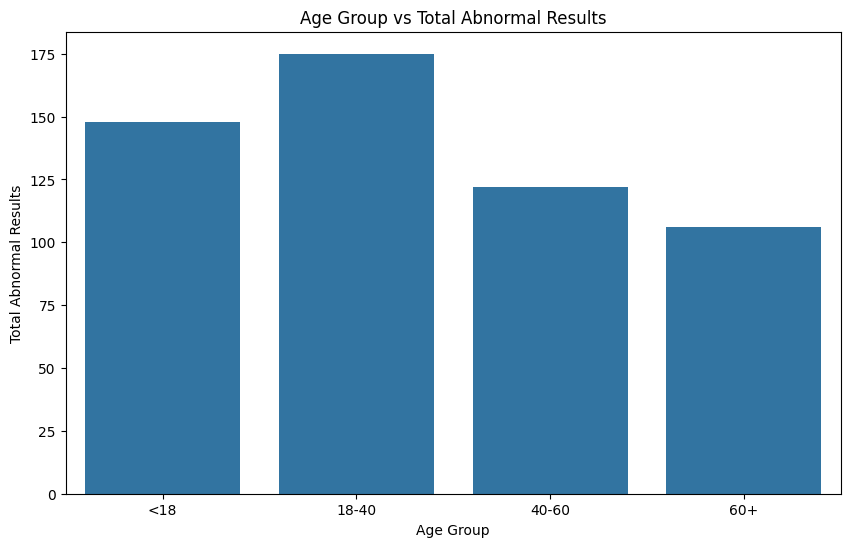

In [ ]:
##What is the distribution of abnormal results across different age groups?
# Create age groups
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, 100], labels=['<18', '18-40', '40-60', '60+'])

# Calculate abnormal results by age group
abnormal_WBC_by_age = df[df['WBC'] > thresholds['WBC']].groupby('Age_group').size()
abnormal_Protein_by_age = df[df['Protein'] > thresholds['Protein']].groupby('Age_group').size()
abnormal_Glucose_by_age = df[df['Glucose'] > thresholds['Glucose']].groupby('Age_group').size()
abnormal_RBC_by_age = df[df['RBC'] > thresholds['RBC']].groupby('Age_group').size()
abnomal_by_age=pd.concat([abnormal_WBC_by_age, abnormal_Protein_by_age, abnormal_Glucose_by_age, abnormal_RBC_by_age], axis=1, keys=['WBC', 'Protein', 'Glucose', 'RBC'])
abnomal_by_age['Total']=abnomal_by_age.sum(axis=1)
print(abnomal_by_age)

# Plotting age group vs total abnormal results
plt.figure(figsize=(10, 6))
sns.barplot(x=abnomal_by_age.index, y=abnomal_by_age['Total'])
plt.xlabel("Age Group")
plt.ylabel("Total Abnormal Results")
plt.title("Age Group vs Total Abnormal Results")
plt.show()

           WBC  Protein  Glucose  RBC  total
Diagnosis                                   
NEGATIVE   233       39       52  148    472
POSITIVE    54        7        7   11     79


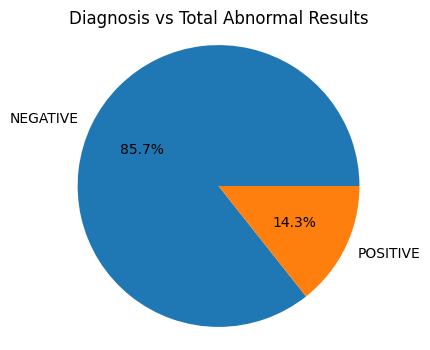

In [ ]:
## Abnormal urinalysis results variation in diagnostic of UTI
# Group by diagnosis and calculate the frequency of abnormal results
abnormal_by_diagnosis = df.groupby('Diagnosis').agg({
    'WBC': lambda x: (x > thresholds['WBC']).sum(),
    'Protein': lambda x: (x > thresholds['Protein']).sum(),
    'Glucose': lambda x: (x > thresholds['Glucose']).sum(),
    'RBC': lambda x: (x > thresholds['RBC']).sum()
})

abnormal_by_diagnosis['total']=abnormal_by_diagnosis.sum(axis=1)
print(abnormal_by_diagnosis)


# Plotting diagnosis vs total abnormal results
plt.figure(figsize=(4,4))
plt.pie(abnormal_by_diagnosis['total'], labels=abnormal_by_diagnosis.index, autopct='%1.1f%%')
plt.title("Diagnosis vs Total Abnormal Results")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




         Abnormal Rate
WBC           0.200000
RBC           0.110801
Glucose       0.041115
Protein       0.032056
pH            0.000000


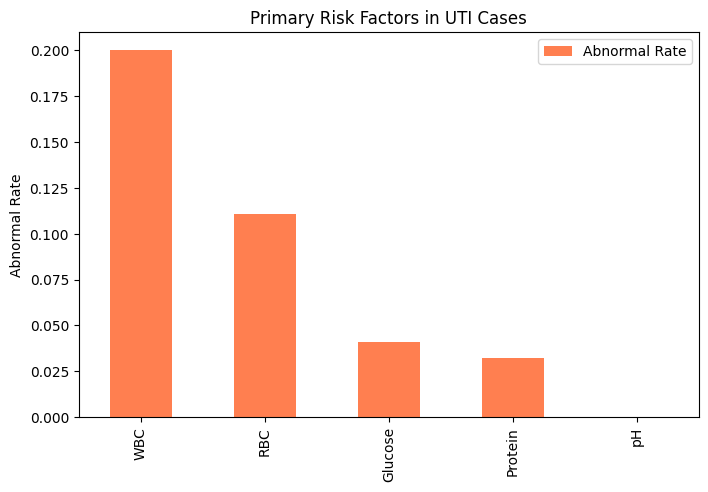

In [ ]:
##Primary Risk Factors in UTI Cases
abnormal_params = {
    'Glucose': (df['Glucose'] > 1).mean(),
    'Protein': (df['Protein'] > 1).mean(),
    'WBC': (df['WBC'] > 5).mean(),
    'RBC': (df['RBC'] > 3).mean(),
    'pH': ((df['pH'] < 5) | (df['pH'] > 8.0)).mean()
}

abnormal_df = pd.DataFrame(abnormal_params, index=['Abnormal Rate']).T
abnormal_df.sort_values(by='Abnormal Rate', ascending=False, inplace=True)
print(abnormal_df)


abnormal_df.plot(kind='bar', figsize=(8, 5), color='coral')
plt.title('Primary Risk Factors in UTI Cases')
plt.ylabel('Abnormal Rate')
plt.show()


In [ ]:
positive_data=df[df['Diagnosis']=='POSITIVE']
negative_data = df[df['Diagnosis'] == 'NEGATIVE']

In [ ]:
##Urine Color Distribution in UTI Diagnosis
positive_color_counts = positive_data.groupby('Color').size().reset_index(name='Count')
negative_color_counts = negative_data.groupby('Color').size().reset_index(name='Count')


fig = make_subplots(rows=1, cols=2, subplot_titles=('Positive UTI Cases', 'Negative UTI Cases'),
                    specs=[[{'type': 'pie'}, {'type': 'pie'}]])


fig.add_trace(go.Pie(labels=positive_color_counts['Color'],
                     values=positive_color_counts['Count'],
                     name="Positive UTI",
                     textinfo='label+percent',
                     textposition='inside',
                     hole=0.3),
              row=1, col=1)


fig.add_trace(go.Pie(labels=negative_color_counts['Color'],
                     values=negative_color_counts['Count'],
                     name="Negative UTI",
                     textinfo='label+percent',
                     textposition='inside',
                     hole=0.3),
              row=1, col=2)


fig.update_layout(title_text="Urine Color Distribution in UTI Diagnosis",
                  height=600,
                  showlegend=True)


fig.show()

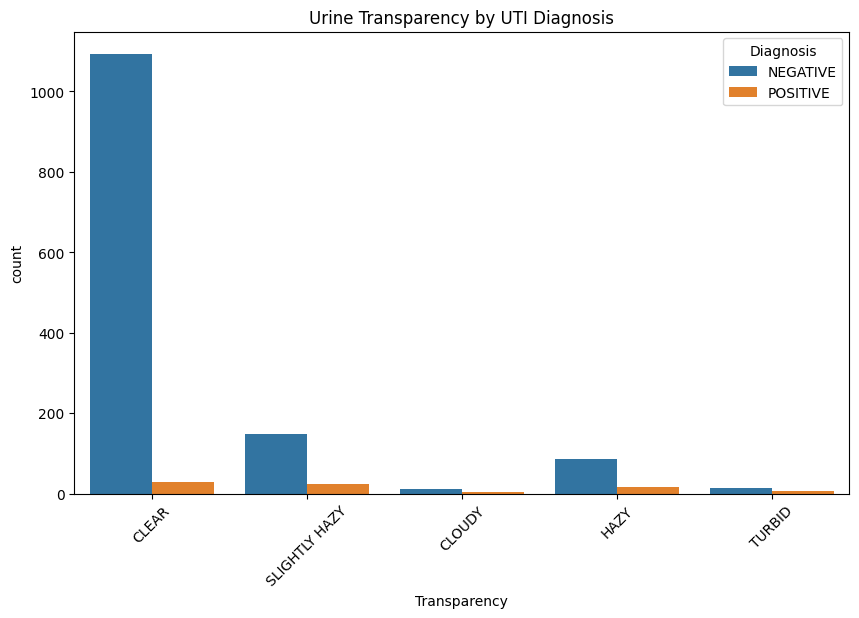

In [ ]:
#How does urine Tranparency vary between positive and negative diagnoses?
plt.figure(figsize=(10,6))
sns.countplot(x='Transparency', hue='Diagnosis', data=df)
plt.title('Urine Transparency by UTI Diagnosis')
plt.xticks(rotation=45)
plt.show()


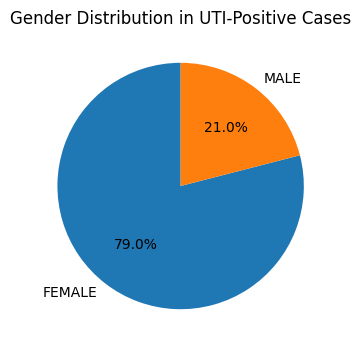

In [ ]:
## Gender Distribution in UTI-Positive Cases
gender_counts = positive_data['Gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution in UTI-Positive Cases')
plt.show()

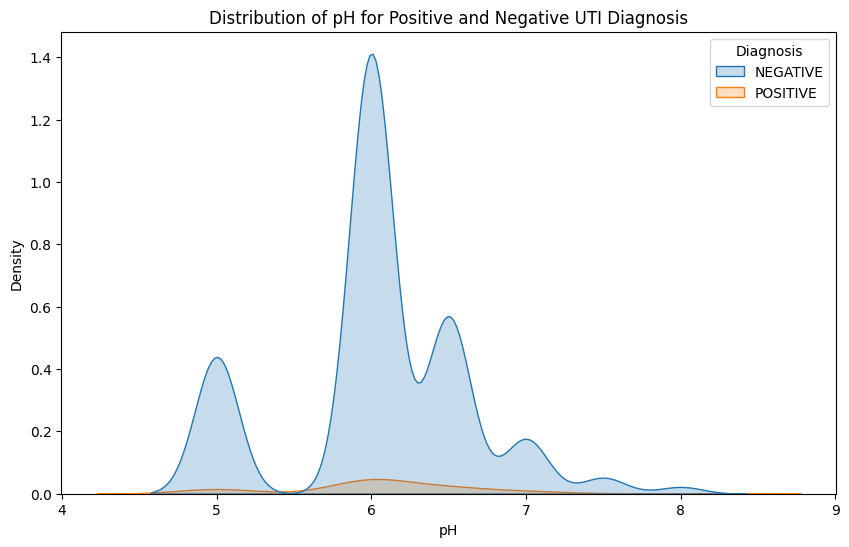

In [ ]:
# Distribution of pH for Positive and Negative UTI Diagnosis
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='pH', hue='Diagnosis', fill=True)
plt.title('Distribution of pH for Positive and Negative UTI Diagnosis')
plt.show()


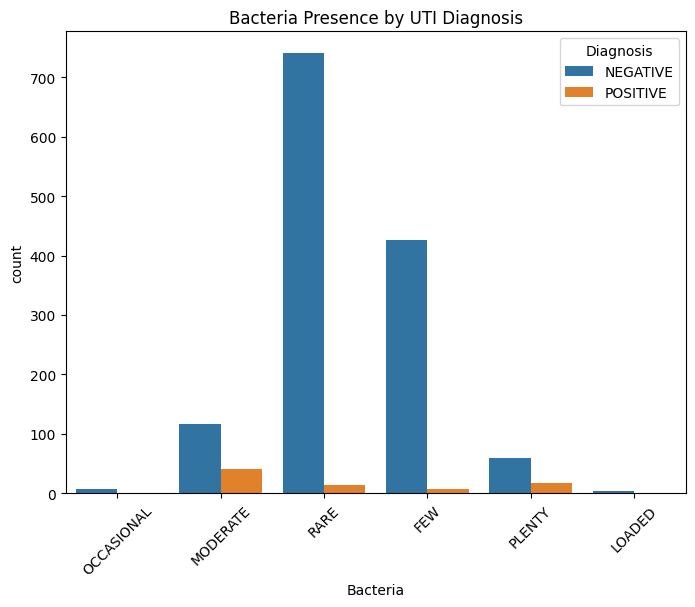

In [ ]:
## Bacteria Presence by UTI Diagnosis
plt.figure(figsize=(8,6))
sns.countplot(x='Bacteria', hue='Diagnosis', data=df)
plt.title('Bacteria Presence by UTI Diagnosis')
plt.xticks(rotation=45)
plt.show()